### Our goal is to create a dataframe of the Country Music Hall of Fame music's highest honor

###### This information is available at https://countrymusichalloffame.org/hall-of-fame/members/, but you will take the contents of this website and convert it into a pandas DataFrame.

Lets gather the libraries

In [37]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt

- It's a good idea to view the page source first to see how it's structured
- The devtools may also be helpful
    - in Chrome right-click and choose `inspect` or just use `F12` to bring up the devtools

#### Make a request using the `requests` [library](https://requests.readthedocs.io/en/master/user/quickstart/)
- `request.get()` uses http GET to get a webpage
- `request.post()` uses http POST when the webpage is submitting a form
- checking the [`status_code`](https://www.restapitutorial.com/httpstatuscodes.html) on the result let's you know your request was successful


In [3]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [4]:
print(type(response))

<class 'requests.models.Response'>


In [5]:
response.content

b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [6]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [7]:
print(soup)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/respond.min.js"></script>
<![endif]-->
<title>Hall of Fam

### You can get the table that contains the data from the page using beautiful soup


In [8]:
# identify a tag that might be helpful for finding the names of all inductees
#artists= soup.find_all(['h3'])
names = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
print(names)
print('\n\n*******************************************')
#artists_inducted = soup.find_all(class_="vertical-card_content--copy")                
#print(artists_inducted)
inducted_years = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
inducted_years

#as you look at the code on the webpage, the attr help to narrow down the exact results you want to pull

[<div class="vertical-card_content--title">
<h3>Roy Acuff</h3>
</div>, <div class="vertical-card_content--title">
<h3>Alabama</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bill Anderson</h3>
</div>, <div class="vertical-card_content--title">
<h3>Eddy Arnold</h3>
</div>, <div class="vertical-card_content--title">
<h3>Chet Atkins</h3>
</div>, <div class="vertical-card_content--title">
<h3>Gene Autry</h3>
</div>, <div class="vertical-card_content--title">
<h3>DeFord Bailey</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bobby Bare</h3>
</div>, <div class="vertical-card_content--title">
<h3>Johnny Bond</h3>
</div>]


*******************************************


[<div class="vertical-card_content--copy">
 <p>
                     Inducted 1962                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2001                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1966                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1973                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1969                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2013                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1999      

### It is a good idea to check to see how many tables you scraped
- then use `pd.read_html()` get a list dataframes extracted from the soup tables
- you'll need to convert the tables (still a response object) to a string before pandas can read it
- to load the table you want to a dataframe, grab it from the list of dataframes

In [9]:
type(names)

bs4.element.ResultSet

In [10]:
len(names)

9

###### Method 1 to pull names of artists

In [11]:
# Create an iteration to extract the name in the soup

artist=[]
for name in soup.find_all('h3'):
    print(name.text)
    artist.append(name.text)


Roy Acuff
Alabama
Bill Anderson
Eddy Arnold
Chet Atkins
Gene Autry
DeFord Bailey
Bobby Bare
Johnny Bond


##### Clean Artist List

In [12]:
print(artist)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


###### Method 2 to pull names of artists

In [13]:
# # converting the normal html artist
#artists= soup.find_all(['h3'])
# artist = pd.DataFrame(artists) # a list of dataframes
# (artist)

In [14]:
inducted_year = []
for element in soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'}):
    #print(element.text)
    #element.text.strip()
    inducted_year.append(element.text)

##### Clean Year List

In [15]:
inducted_year


['\n\n                    Inducted 1962                  \n',
 '\n\n                    Inducted 2005                  \n',
 '\n\n                    Inducted 2001                  \n',
 '\n\n                    Inducted 1966                  \n',
 '\n\n                    Inducted 1973                  \n',
 '\n\n                    Inducted 1969                  \n',
 '\n\n                    Inducted 2005                  \n',
 '\n\n                    Inducted 2013                  \n',
 '\n\n                    Inducted 1999                  \n']

In [16]:
# identify whether \n were a separate line by itself.
print(list(enumerate(inducted_year)))

[(0, '\n\n                    Inducted 1962                  \n'), (1, '\n\n                    Inducted 2005                  \n'), (2, '\n\n                    Inducted 2001                  \n'), (3, '\n\n                    Inducted 1966                  \n'), (4, '\n\n                    Inducted 1973                  \n'), (5, '\n\n                    Inducted 1969                  \n'), (6, '\n\n                    Inducted 2005                  \n'), (7, '\n\n                    Inducted 2013                  \n'), (8, '\n\n                    Inducted 1999                  \n')]


###### Method 1 to extract digits:

In [17]:
##One method that works to pull digits from a string is as follows
# year_c =[]
# for element in year:
#     print('element ',element.index)
#     year_c.append( ''.join(filter(lambda i: i.isdigit(), element)))

# year_c

###### Method 2 to extract digits:

In [18]:
# Strip the white space elements in the year list forllowed by .replace to remove Inducted
year =[]
for x in inducted_year:
    year.append(x.strip().replace('Inducted ',""))
year

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']

###### Some guidance provided by the team
- https://www.youtube.com/watch?v=ooj84UP3r6M&ab_channel=DataProfessor
- https://www.youtube.com/watch?v=zXif_9RVadI


#### Take the two lists you created on parts 1 and 2 and convert it into a pandas DataFrame

In [19]:
# Create a blank data frame
df = pd.DataFrame()
# Add the first column to the dataframe
df['artist']  = artist
# Add the second column to the dataframe
df['year'] = year
df

,artist,year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


##### Take what you created for the first page and apply it across the rest of the pages so that you can scrape all inductees

In [20]:
# The following pages will follow "https://countrymusichalloffame.org/hall-of-fame/members/page/2

website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'

In [21]:
artist.clear()
artist

[]

In [22]:
inducted_year.clear()
inducted_year

[]

In [23]:

artist.clear()
inducted_year.clear()
year.clear()

#for known number of pages, set up a loop to extract artists & inducted year

for page in range(1,17):
   # Concatenate to get new page URL
    page_url = website_url+'page/'+str(page)
    
   # print('website url is ', page_url)

    #Concatenate to get new page URL
    response = requests.get(page_url)
    print('Page ',page,'- ','response status',response.status_code)
    
    #Make a soup from the above response
    soup = BeautifulSoup(response.content, 'lxml')
    
    # Extract all Artists name from the soup and add it a list called artist
    for name in soup.find_all('h3'):
     #print(name.text)
         artist.append(name.text)

     # Extract inducted years from the soup and add it a list called inducted year
    for element in soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'}):
        #print(element.text)
        #element.text.strip()
        inducted_year.append(element.text)
#         for x in inducted_year:
#             year.append(x.strip().replace('Inducted ',""))


Page  1 -  response status 200
Page  2 -  response status 200
Page  3 -  response status 200
Page  4 -  response status 200
Page  5 -  response status 200
Page  6 -  response status 200
Page  7 -  response status 200
Page  8 -  response status 200
Page  9 -  response status 200
Page  10 -  response status 200
Page  11 -  response status 200
Page  12 -  response status 200
Page  13 -  response status 200
Page  14 -  response status 200
Page  15 -  response status 200
Page  16 -  response status 200


In [24]:
inducted_year

['\n\n                    Inducted 1962                  \n',
 '\n\n                    Inducted 2005                  \n',
 '\n\n                    Inducted 2001                  \n',
 '\n\n                    Inducted 1966                  \n',
 '\n\n                    Inducted 1973                  \n',
 '\n\n                    Inducted 1969                  \n',
 '\n\n                    Inducted 2005                  \n',
 '\n\n                    Inducted 2013                  \n',
 '\n\n                    Inducted 1999                  \n',
 '\n\n                    Inducted 2011                  \n',
 '\n\n                    Inducted 2006                  \n',
 '\n\n                    Inducted 2019                  \n',
 '\n\n                    Inducted 1974                  \n',
 '\n\n                    Inducted 1987                  \n',
 '\n\n                    Inducted 2012                  \n',
 '\n\n                    Inducted 2019                  \n',
 '\n\n  

In [25]:
artist

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond',
 'Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harris',
 'George D. Hay',
 'Homer and Jethro',
 'Roy Horton',
 'Har

#### Clean the above lists and make a dataframe

In [26]:
# Strip the white space elements in the year list forllowed by .replace to remove Inducted
year =[]
for x in inducted_year:
    year.append(x.strip().replace('Inducted ',""))
year

['1962',
 '2005',
 '2001',
 '1966',
 '1973',
 '1969',
 '2005',
 '2013',
 '1999',
 '2011',
 '2006',
 '2019',
 '1974',
 '1987',
 '2012',
 '2019',
 '2015',
 '2015',
 '1991',
 '2005',
 '2002',
 '1970',
 '1980',
 '2009',
 '2013',
 '1973',
 '2014',
 '1976',
 '2003',
 '1981',
 '2016',
 '1972',
 '2010',
 '2001',
 '1966',
 '1983',
 '2007',
 '2001',
 '1985',
 '2004',
 '1967',
 '1990',
 '2016',
 '1967',
 '1982',
 '1980',
 '2001',
 '2007',
 '2018',
 '1994',
 '2008',
 '2008',
 '1966',
 '2001',
 '1982',
 '1997',
 '2010',
 '2017',
 '2006',
 '2001',
 '1992',
 '1978',
 '2001',
 '1974',
 '2004',
 '2001',
 '1997',
 '1979',
 '2001',
 '1988',
 '1966',
 '2009',
 '2015',
 '2009',
 '2011',
 '1995',
 '2014',
 '1970',
 '1996',
 '1998',
 '2001',
 '1993',
 '2015',
 '1996',
 '1999',
 '1975',
 '1984',
 '2001',
 '2001',
 '1998',
 '1992',
 '1996',
 '2000',
 '2017',
 '1967',
 '1964',
 '2012',
 '1982',
 '1961',
 '2013',
 '1988',
 '1961',
 '1986',
 '1971',
 '2017',
 '2011',
 '2010',
 '1967',
 '2018',
 '2003',
 '2012',
 

#### Take the two lists (artist, year)  created on parts 1 and 2 and convert it into a pandas DataFrame

In [27]:
# Create a blank data frame
induction_df = pd.DataFrame()
# Add the first column to the dataframe
induction_df['artist']  = artist
# Add the second column to the dataframe
induction_df['year'] = year
induction_df

,artist,year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


In [28]:
induction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  140 non-null    object
 1   year    140 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


##### To `SAVE` the data frame of induction in a CSV format to perform the Bonus Question in a new file

In [29]:
induction_df.to_csv('induction.csv',index=False)

In [32]:
induction_df.year =induction_df.year.astype('int')

In [34]:
induction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  140 non-null    object
 1   year    140 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.8+ KB


Text(0.5, 1.0, 'Hall of Fame Artists by Induction Year')

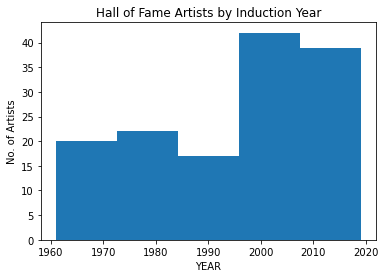

In [44]:
plt.hist(induction_df["year"], bins =5)
plt.xlabel('YEAR')
plt.ylabel('No. of Artists')
plt.title('Hall of Fame Artists by Induction Year')

Text(0.5, 1.0, 'Hall of Fame Artists by Induction Year')

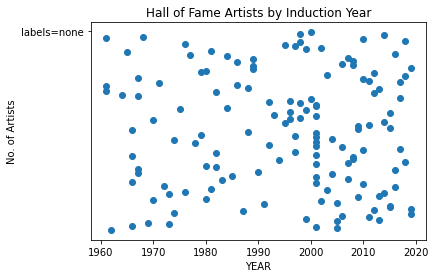

In [43]:
plt.scatter(induction_df["year"],induction_df["artist"] )
plt.xlabel('YEAR')
plt.ylabel('No. of Artists')
plt.yticks('labels=none')
plt.title('Hall of Fame Artists by Induction Year')